# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.constants import convert_temperature
from scipy.stats import linregress as linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [107]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [108]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | bodo
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | sokoto
Processing Record 10 of Set 1 | udachny
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | dzuunharaa
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | talnakh
Processing Record 22 o

In [109]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [110]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,278.38,59,41,2.68,US,1731132422
1,blackmans bay,-43.0167,147.3167,289.22,52,100,3.39,AU,1731132547
2,port alfred,-33.5906,26.8910,293.81,86,58,1.79,ZA,1731132549
3,bodo,67.2800,14.4050,279.69,74,40,7.20,NO,1731132550
4,bethel,41.3712,-73.4140,281.77,50,0,5.66,US,1731132551


In [111]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [112]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,278.38,59,41,2.68,US,1731132422
1,blackmans bay,-43.0167,147.3167,289.22,52,100,3.39,AU,1731132547
2,port alfred,-33.5906,26.8910,293.81,86,58,1.79,ZA,1731132549
3,bodo,67.2800,14.4050,279.69,74,40,7.20,NO,1731132550
4,bethel,41.3712,-73.4140,281.77,50,0,5.66,US,1731132551


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

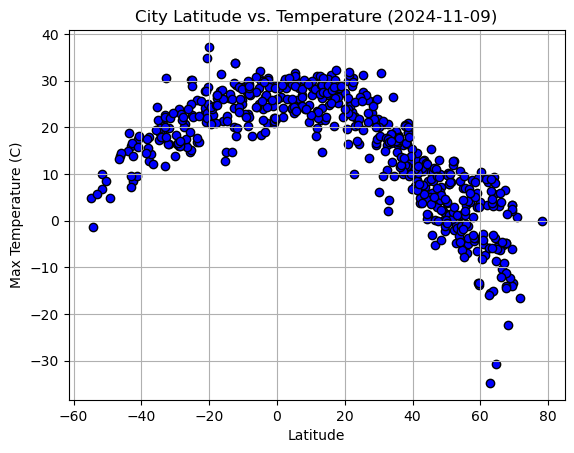

In [113]:
# Change Max Temp from Kelvin to Celsius
city_data_df["Max Temp"] = convert_temperature(city_data_df["Max Temp"], old_scale="Kelvin", new_scale="Celsius")

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolors="b", edgecolors="black")
time_stamp = datetime.datetime.fromtimestamp(float(city_data_df["Date"][0]))
time_stamp_date = time_stamp.date()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

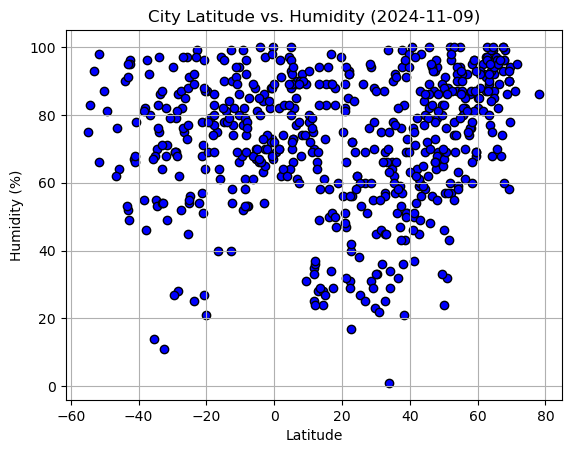

In [114]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolors="b", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

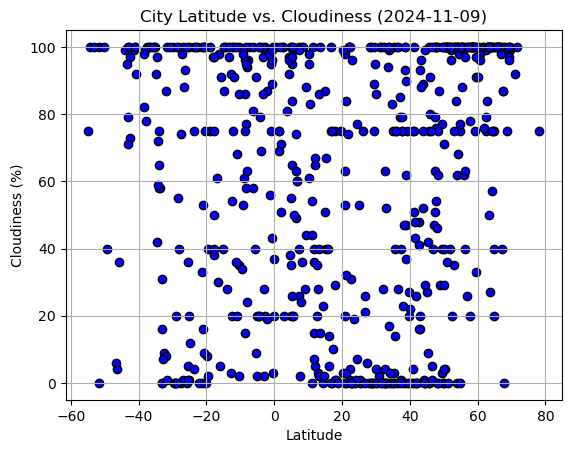

In [115]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolors="b", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

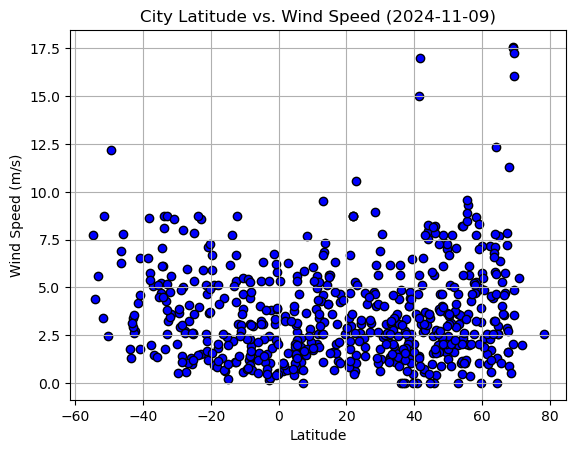

In [116]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolors="b", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [117]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values):
# Returns linear regression formula through stats.linregress and 2 sets of data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    return [(x_values * slope + intercept), slope, intercept, rvalue, pvalue, stderr]

In [118]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.23,59,41,2.68,US,1731132422
3,bodo,67.2800,14.4050,6.54,74,40,7.20,NO,1731132550
4,bethel,41.3712,-73.4140,8.62,50,0,5.66,US,1731132551
7,hawaiian paradise park,19.5933,-154.9731,22.16,97,75,2.57,US,1731132554
8,sokoto,13.0609,5.2390,21.46,28,28,4.62,NG,1731132067


In [119]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,16.07,52,100,3.39,AU,1731132547
2,port alfred,-33.5906,26.8910,20.66,86,58,1.79,ZA,1731132549
5,waitangi,-43.9535,-176.5597,14.90,90,99,1.79,NZ,1731132552
6,port-aux-francais,-49.3500,70.2167,4.75,81,40,12.18,TF,1731132553
10,puerto natales,-51.7236,-72.4875,6.73,98,100,3.42,CL,1731132557


###  Temperature vs. Latitude Linear Regression Plot

the r^2 value is: -0.8807852726519114


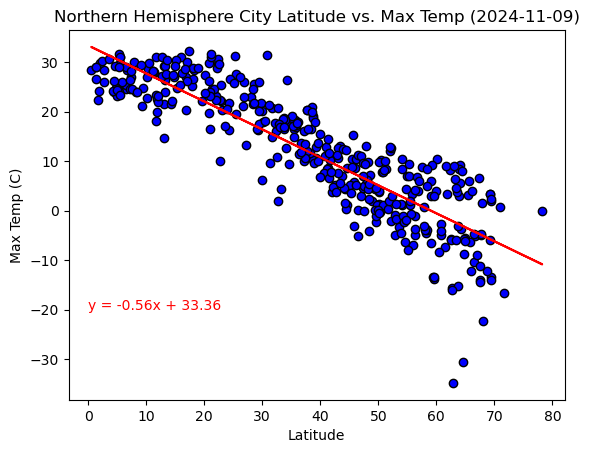

In [120]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], facecolors="b", edgecolors="black")

# Change plot format
plt.title(f"Northern Hemisphere City Latitude vs. Max Temp ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")


# Plot Linear Regression
lat_temp_lingress = linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], lat_temp_lingress[0], "r-")
plt.annotate(f"y = {round(lat_temp_lingress[1], 2)}x + {round(lat_temp_lingress[2], 2)}", xy=(0, -20), color="red")

# Print r^2 value
print(f"the r^2 value is: {lat_temp_lingress[3]}")

#Save file
plt.savefig("output_data/Fig5.png")

# Display scatter with linear regression
plt.show()

the r^2 value is: 0.7195505072001331


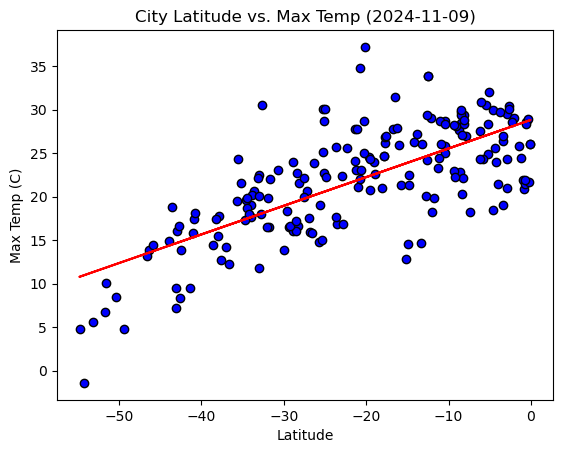

In [121]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], facecolors="b", edgecolors="black")

# Change plot format
plt.title(f"City Latitude vs. Max Temp ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")


# Plot Linear Regression
lat_temp_lingress = linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], lat_temp_lingress[0], "r-")
plt.annotate(f"y = {round(lat_temp_lingress[1], 2)}x + {round(lat_temp_lingress[2], 2)}", xy=(-55, 40), color="red")

# Print r^2 value
print(f"the r^2 value is: {lat_temp_lingress[3]}")

#Save file
plt.savefig("output_data/Fig6.png")

# Display scatter with linear regression
plt.show()

**Discussion about the linear relationship:** 

Latitude is highly correlated to the max temperature in cities of both hemispheres. As latitude values get further from latitude 0, max temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

the r^2 value is: 0.2759117223766995


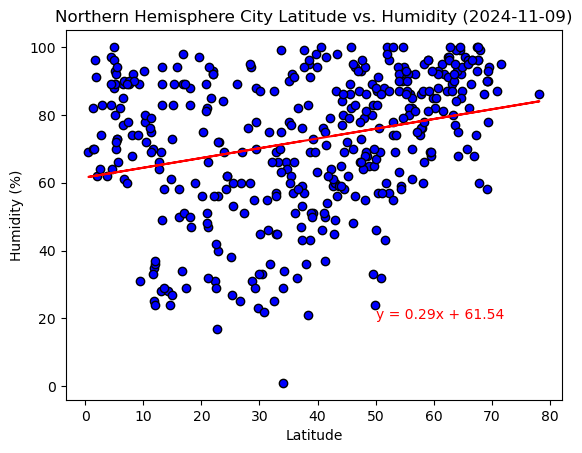

In [122]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], facecolors="b", edgecolors="black")

# Change plot format
plt.title(f"Northern Hemisphere City Latitude vs. Humidity ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Plot Linear Regression
lat_temp_lingress = linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], lat_temp_lingress[0], "r-")
plt.annotate(f"y = {round(lat_temp_lingress[1], 2)}x + {round(lat_temp_lingress[2], 2)}", xy=(50, 20), color="red")

# Print r^2 value
print(f"the r^2 value is: {lat_temp_lingress[3]}")

#Save file
plt.savefig("output_data/Fig7.png")

# Display scatter with linear regression
plt.show()

the r^2 value is: 0.09042881887626923


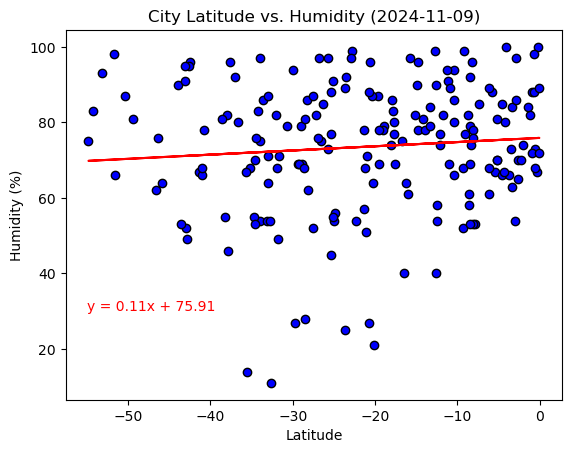

In [123]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], facecolors="b", edgecolors="black")

# Change plot format
plt.title(f"City Latitude vs. Humidity ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Plot Linear Regression
lat_temp_lingress = linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], lat_temp_lingress[0], "r-")
plt.annotate(f"y = {round(lat_temp_lingress[1], 2)}x + {round(lat_temp_lingress[2], 2)}", xy=(-55, 30), color="red")

# Print r^2 value
print(f"the r^2 value is: {lat_temp_lingress[3]}")

#Save file
plt.savefig("output_data/Fig8.png")

# Display scatter with linear regression
plt.show()

**Discussion about the linear relationship:** 

Latitude has little to no correlation to humidity in cities of both hemispheres. As latitude values get further from 0 in the Northern Hemisphere, humidity increases with low certainty. Inversely, as latitude values get further from 0 in the Southern Hemisphere, humidity decreases with low certainty. 

### Cloudiness vs. Latitude Linear Regression Plot

the r^2 value is: 0.2937848458925215


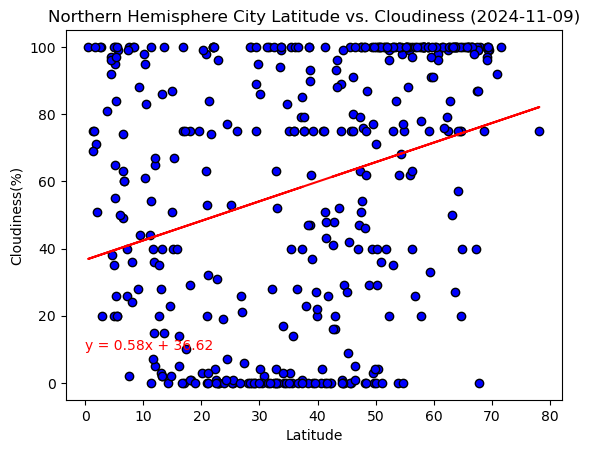

In [124]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], facecolors="b", edgecolors="black")

# Change plot format
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")


# Plot Linear Regression
lat_temp_lingress = linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], lat_temp_lingress[0], "r-")
plt.annotate(f"y = {round(lat_temp_lingress[1], 2)}x + {round(lat_temp_lingress[2], 2)}", xy=(0, 10), color="red")

# Print r^2 value
print(f"the r^2 value is: {lat_temp_lingress[3]}")

#Save file
plt.savefig("output_data/Fig9.png")

# Display scatter with linear regression
plt.show()

the r^2 value is: -0.0213962340174401


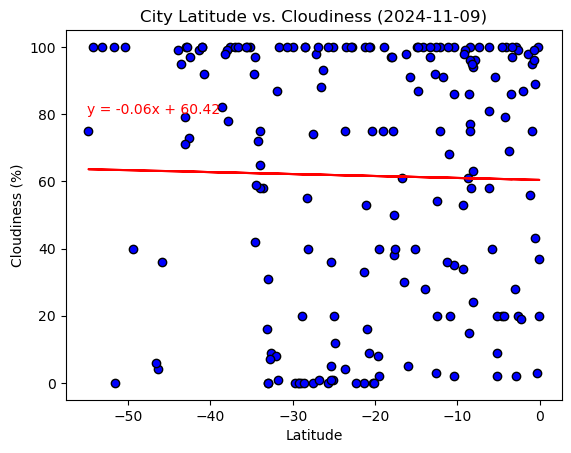

In [125]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], facecolors="b", edgecolors="black")

# Change plot format
plt.title(f"City Latitude vs. Cloudiness ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Plot Linear Regression
lat_temp_lingress = linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], lat_temp_lingress[0], "r-")
plt.annotate(f"y = {round(lat_temp_lingress[1], 2)}x + {round(lat_temp_lingress[2], 2)}", xy=(-55, 80), color="red")

# Print r^2 value
print(f"the r^2 value is: {lat_temp_lingress[3]}")

#Save file
plt.savefig("output_data/Fig10.png")

# Display scatter with linear regression
plt.show()

**Discussion about the linear relationship:** 

Latitude has little to no correlation to cloudiness in both hemispheres (more correlated in sampled Northern Hemisphere cities). As latitude values get further from 0, cloudiness increases. 

### Wind Speed vs. Latitude Linear Regression Plot

the r^2 value is: 0.2094196837398905


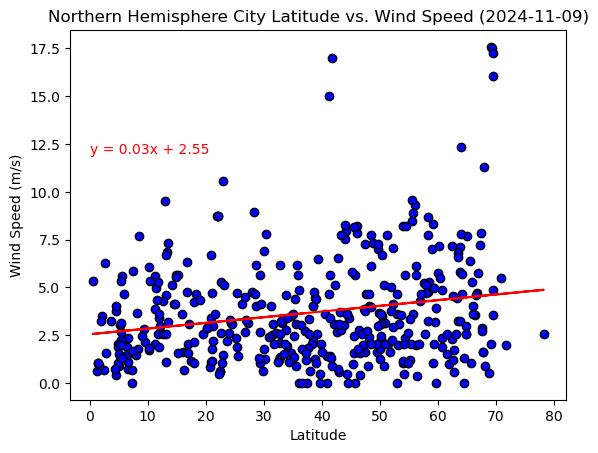

In [126]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], facecolors="b", edgecolors="black")

# Change plot format
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Plot Linear Regression
lat_temp_lingress = linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], lat_temp_lingress[0], "r-")
plt.annotate(f"y = {round(lat_temp_lingress[1], 2)}x + {round(lat_temp_lingress[2], 2)}", xy=(0, 12), color="red")

# Print r^2 value
print(f"the r^2 value is: {lat_temp_lingress[3]}")

#Save file
plt.savefig("output_data/Fig11.png")

# Display scatter with linear regression
plt.show()

the r^2 value is: -0.35002559356180807


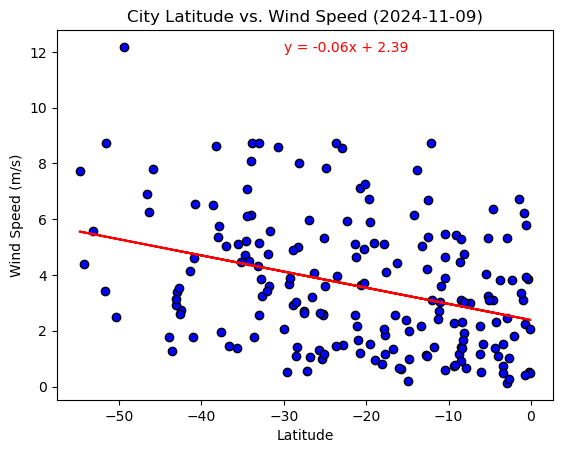

In [127]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], facecolors="b", edgecolors="black")

# Change plot format
plt.title(f"City Latitude vs. Wind Speed ({time_stamp_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Plot Linear Regression
lat_temp_lingress = linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], lat_temp_lingress[0], "r-")
plt.annotate(f"y = {round(lat_temp_lingress[1], 2)}x + {round(lat_temp_lingress[2], 2)}", xy=(-30, 12), color="red")

# Print r^2 value
print(f"the r^2 value is: {lat_temp_lingress[3]}")

#Save file
plt.savefig("output_data/Fig12.png")

# Display scatter with linear regression
plt.show()

**Discussion about the linear relationship:**

Latitude is weakly correlated to wind speed in both hemispheres. As latitude values get further from 0, wind speed increases. 